In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loan = pd.read_csv('loan_data.csv')
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
loan.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [4]:
loan.shape

(9578, 14)

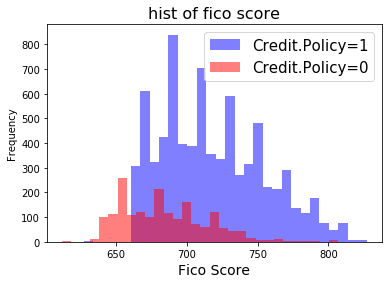

In [5]:
loan[loan['credit.policy']==1]['fico'].plot.hist(bins=30,alpha=0.5,color='blue',label='Credit.Policy=1')
loan[loan['credit.policy']==0]['fico'].plot.hist(bins=30,alpha=0.5,color='red',label='Credit.Policy=0')
plt.legend(fontsize=15)
plt.title("hist of fico score",fontsize=16)
plt.xlabel("Fico Score",fontsize=14)
plt.show()
     
     
     

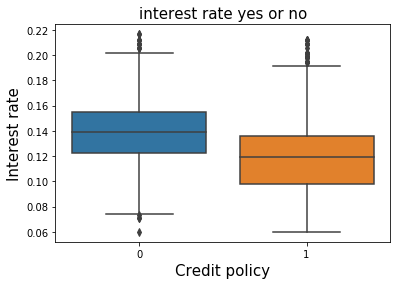

In [6]:
sns.boxplot(x=loan['credit.policy'],y=loan['int.rate'])
plt.title("interest rate yes or no", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Interest rate",fontsize=15)
plt.show()

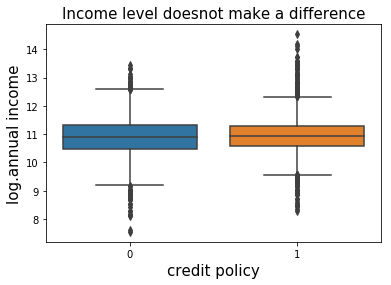

In [7]:
sns.boxplot(x=loan['credit.policy'],y=loan['log.annual.inc'])
plt.title("Income level doesnot make a difference",fontsize=15)
plt.xlabel("credit policy",fontsize=15)
plt.ylabel("log.annual income",fontsize=15)
plt.show()

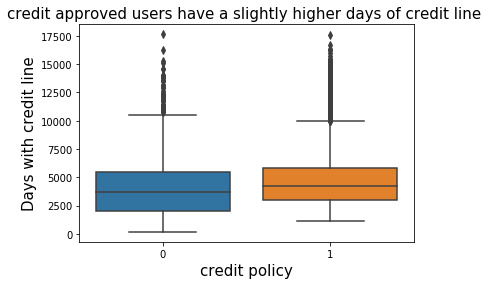

In [8]:
sns.boxplot(x=loan['credit.policy'],y=loan['days.with.cr.line'])
plt.title("credit approved users have a slightly higher days of credit line ",fontsize=15)
plt.xlabel("credit policy",fontsize=15)
plt.ylabel("Days with credit line",fontsize=15)
plt.show()

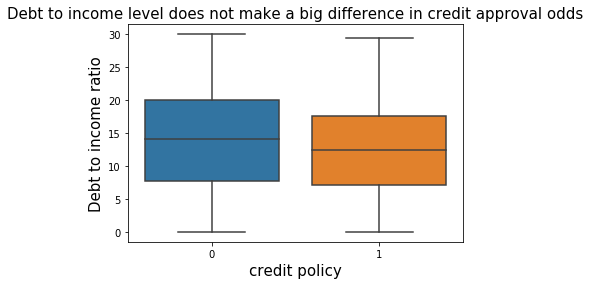

In [11]:
sns.boxplot(x=loan['credit.policy'],y=loan['dti'])
plt.title("Debt to income level does not make a big difference in credit approval odds",fontsize=15)
plt.xlabel("credit policy",fontsize=15)
plt.ylabel("Debt to income ratio",fontsize=15)
plt.show()

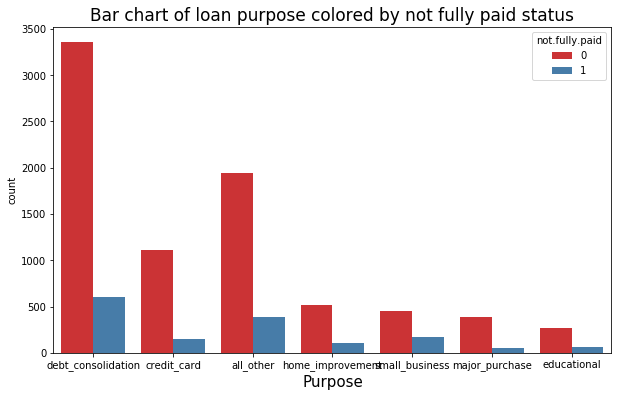

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose', hue='not.fully.paid',data=loan,palette='Set1')
plt.title("Bar chart of loan purpose colored by not fully paid status",fontsize=17)
plt.xlabel("Purpose",fontsize=15)
plt.show()

C:\Users\Deepankar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Deepankar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


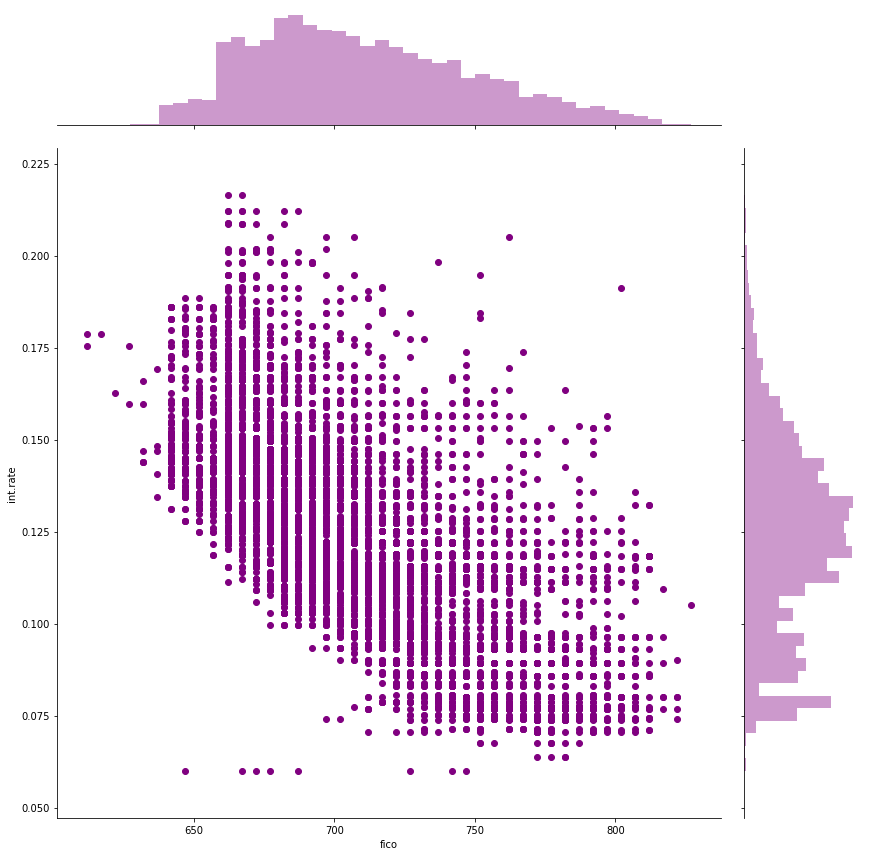

In [13]:
sns.jointplot(x='fico',y='int.rate', data=loan,color='purple',size=12)
plt.show()

In [10]:
loan_final= pd.get_dummies(loan,['purpose'],drop_first=True)

In [11]:
loan_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [12]:
loan_final.dtypes

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
not.fully.paid                  int64
purpose_credit_card             uint8
purpose_debt_consolidation      uint8
purpose_educational             uint8
purpose_home_improvement        uint8
purpose_major_purchase          uint8
purpose_small_business          uint8
dtype: object

In [27]:
from sklearn.model_selection import train_test_split
X= loan_final.drop('not.fully.paid',axis=1)
y= loan_final['not.fully.paid']
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtree= DecisionTreeClassifier(criterion='gini',max_depth=None)

In [30]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
predictions= dtree.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.83      0.84      2410
          1       0.21      0.23      0.22       464

avg / total       0.75      0.74      0.74      2874



In [34]:
from sklearn.metrics import accuracy_score

In [35]:
print(accuracy_score(y_test,predictions))

0.7379958246346555


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rfc= RandomForestClassifier(n_estimators=600)

In [54]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
rfc_pred = rfc.predict(X_test)

In [56]:
cr= classification_report(y_test,rfc_pred)

In [57]:
print(cr)

             precision    recall  f1-score   support

          0       0.84      0.99      0.91      2410
          1       0.36      0.02      0.03       464

avg / total       0.76      0.84      0.77      2874



In [58]:
cm= confusion_matrix(y_test,rfc_pred)
print(cm)

[[2396   14]
 [ 456    8]]


In [64]:
nsimu =21
accuracy = [0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train,y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i]=(cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

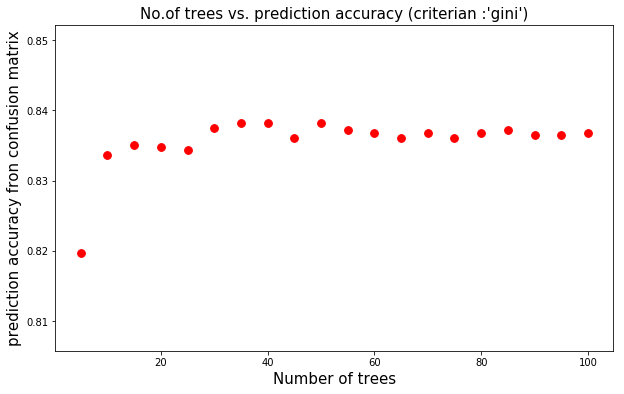

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("No.of trees vs. prediction accuracy (criterian :'gini')",fontsize=15)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("prediction accuracy fron confusion matrix",fontsize=15)
plt.show()

In [66]:
nsimu =21
accuracy = [0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='entropy')
    rfc.fit(X_train,y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i]=(cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

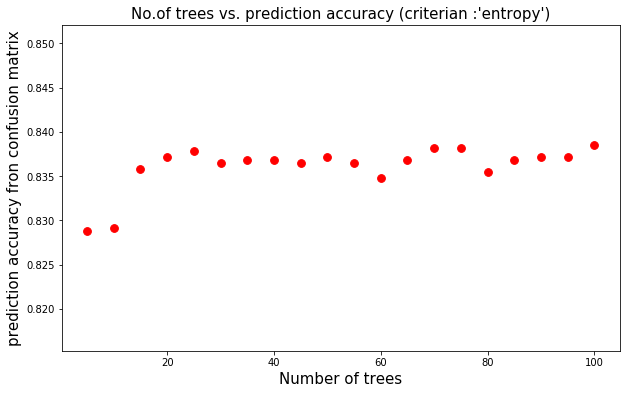

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("No.of trees vs. prediction accuracy (criterian :'entropy')",fontsize=15)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("prediction accuracy fron confusion matrix",fontsize=15)
plt.show()